 **INTRODUCTION**

 We'll learn, practise and compare 6 classification models in this project. So, you'll see in this kernel:

* EDA (Exploratory Data Analysis)
* What is Confusion Matrix?
* Test-Train Datas Split
* Logistic Regression Classification
* KNN Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Desicion Tree Classification
* Random Forest Classification
* Compare all of these Classification Models
* Conclusion

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

: 

In [105]:
# # for path
# # Google Colab
# from google.colab import drive
# drive.mount("/content/gdrive")

In [106]:
# Read our data from dataset.
data = pd.read_csv("liver_cirrhosis.csv")

In [107]:
#Let's looking at top 5 datas.
data

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [108]:
#Let's looking at last 10 datas.
data.tail(10)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
24990,1690,D,D-penicillamine,17512,F,N,Y,N,N,6.3,436.000000,3.02,75.000000,2176.000000,170.500000,104.000000,236.0,10.6,3
24991,4365,C,D-penicillamine,21324,F,N,N,N,N,0.9,346.000000,3.40,81.000000,1098.000000,122.450000,90.000000,228.0,10.3,2
24992,694,D,D-penicillamine,28650,M,Y,Y,Y,N,0.8,300.000000,2.94,231.000000,1794.000000,130.200000,99.000000,97.0,11.2,3
24993,2475,CL,D-penicillamine,13329,F,N,N,N,N,3.4,450.000000,3.37,32.000000,1408.000000,116.250000,118.000000,313.0,11.2,1
24994,1654,C,Placebo,19724,M,Y,N,Y,N,1.7,369.510563,2.38,97.648387,1982.655769,122.556346,124.702128,166.0,9.8,2
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.000000,9009.800000,127.710000,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.000000,9009.800000,127.710000,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.000000,790.000000,179.800000,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.000000,1637.000000,170.500000,70.000000,426.0,10.9,2
24999,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.000000,1637.000000,170.500000,70.000000,426.0,10.9,2


In [109]:
data.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [110]:
# Firstly, we must check our data. If we have NaN values, we should drop them.
data.info()
#As we can see easily, we have no NaN values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

**Our 'label' feature has 2 valuable: male and female. These are string but we need integers for classification. Therefore, we must convert them from object to integer.**

In [116]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

y = le.fit_transform(y)

print(X.head())
print(y)

   N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0    2221       0     1  18499    0        0             1        0      0   
1    1230       0     1  19724    1        1             0        1      0   
2    4184       0     1  11839    0        0             0        0      0   
3    2090       2     1  16467    0        0             0        0      0   
4    2105       2     1  21699    0        0             1        0      0   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0         

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [113]:
X = data

y = data['Status']

z = data['Drug']

b = data['Sex']

c = data['Ascites']

d = data['Hepatomegaly']

e = data['Spiders']

f = data['Edema']

In [115]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Status'] = le.fit_transform(X['Status'])

X['Drug'] = le.fit_transform(X['Drug'])
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Stage'] = le.fit_transform(X['Stage'])

# y = le.transform(y)
X['Sex'] = le.fit_transform(X['Sex'])

X['Ascites'] = le.fit_transform(X['Ascites'])

X['Hepatomegaly'] = le.fit_transform(X['Hepatomegaly'])

X['Spiders'] = le.fit_transform(X['Spiders'])

X['Edema'] = le.fit_transform(X['Edema'])

y = le.transform(y)

ValueError: y contains previously unseen labels: 'C'

In [80]:
# data.label = [1 if each == "male" else 0 for each in data.label]
# We assign 1 to male, 0 to female.

In [96]:
X

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,0,1,18499,0,0,1,0,0,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,0
1,1230,0,1,19724,1,1,0,1,0,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,1
2,4184,0,1,11839,0,0,0,0,0,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,1
3,2090,2,1,16467,0,0,0,0,0,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,1
4,2105,2,1,21699,0,0,1,0,0,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,2,0,23612,0,0,0,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,1
24996,3584,2,0,23612,0,0,0,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,1
24997,971,2,0,16736,0,0,1,1,2,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,2
24998,3707,0,0,16990,0,0,1,0,0,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,1


**Let's check it!**

In [97]:
data

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


**Confusion Matrix**

Before start the classifications, we should know one thing: Confusion Matrix!
For example; we have 100 data point (dogs and cats) and we make a prediction. Our prediction score is 0.8 so we predict well %80. Confusion matrix gives us;
* How many true values we predict true  (TP = True Positive)
* How many true values we predict false  (FP = False Positive)
* How many false values we predict false  (TN = True Negative)
* How many false values we predict true (FN = False Negative


**As you can see; our label features converted integer!**

In [98]:
#We should have x and y values for test-train datas.
y = data.Stage.values
x = data.drop(["Stage"],axis=1)

**After assign x and y value; we should train and test datas split.**

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
#test_size=0.2 means %20 test datas, %80 train datas


In [100]:
# We want to conclude the best methods
method_names = []
method_scores = []
#These are for barplot in conclusion

**And now time to classification our data!**

**We start with:**

**LOGISTIC REGRESSION CLASSIFICATION**

**KNN (K-Nearest Neighbour) CLASSIFICATION**

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 3: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

ValueError: could not convert string to float: 'C'

**n_neighbors is an optional parameter. I wrote it 3 but you can write anything. Let's learn the best value of n_neighbors parameter.**

Text(0, 0.5, 'score')

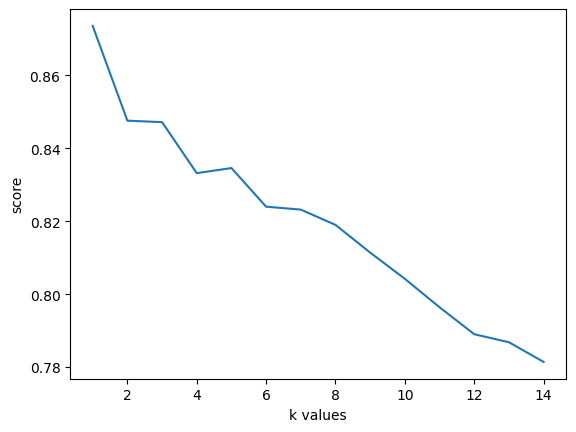

In [ ]:
score_list=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("score")

**As we can see; the best value of n_neighbor is 7. Let's find score when n_neighbors=7**

Score for Number of Neighbors = 7: 0.8232


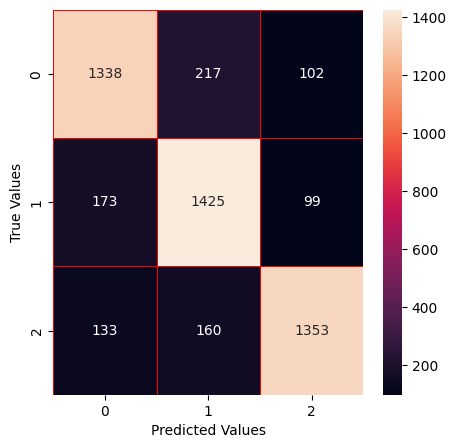

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 7: {}".format(knn.score(x_test,y_test)))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

**SUPPORT VECTOR MACHINE (SVM)**

SVM Classification Score is: 0.496


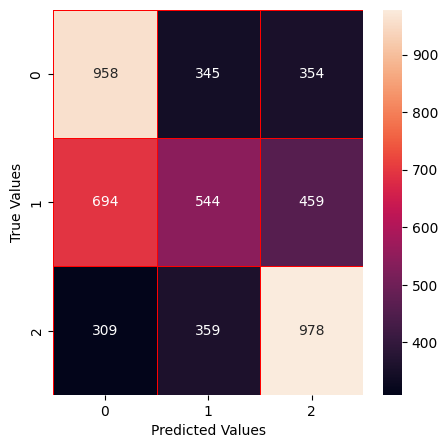

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))

#Confusion Matrix
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

**NAIVE BAYES CLASSIFICATION**

Accuracy of Decision Tree classifier on training set:0.53
Accuracy of Decision Tree classifier on test set: 0.53


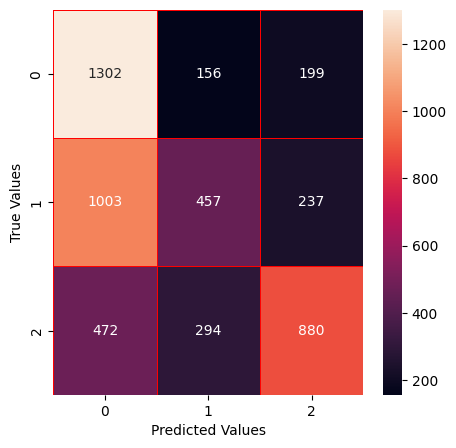

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set:{:.2f}'.format(gnb.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(gnb.score(x_test, y_test)))
method_names.append("GNB")
method_scores.append(gnb.score(x_test,y_test))


#Confusion Matrix
y_pred = gnb.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

**DECISION TREE CLASSIFICATION**

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.92
clf Classification Score is: 0.9174


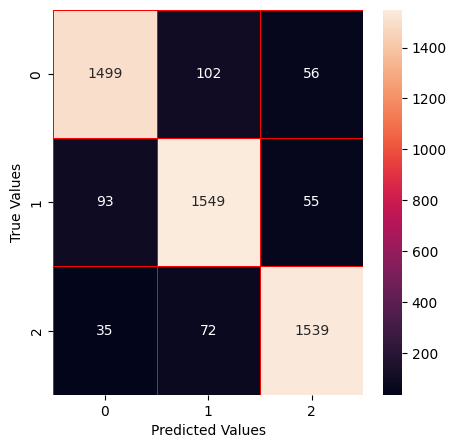

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
.format(clf.score(x_test, y_test)))
print("clf Classification Score is: {}".format(clf.score(x_test,y_test)))
method_names.append("Decision Tree")
method_scores.append(clf.score(x_test,y_test))

#Confusion Matrix
y_pred = clf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


**RANDOM FOREST CLASSIFICATION**

rf Classification Score is: 0.9556


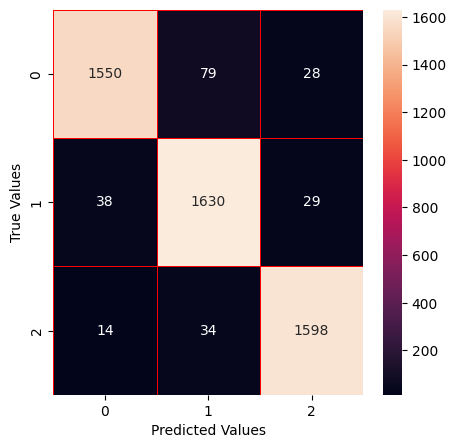

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print("rf Classification Score is: {}".format(rf.score(x_test,y_test)))
method_names.append("Random Forest")
method_scores.append(rf.score(x_test,y_test))

#Confusion Matrix
y_pred = rf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

**CONCLUSION**

We completed seven different classification on this data and we see; Random Forest Classification is the best way to make classification on this dataset. Of course not everytime but for this practice Random Forest gave us the best classifications!

Let's see differences between our methods scores!

In [ ]:
method_names

['KNN', 'SVM', 'Decision Tree', 'Random Forest']

In [ ]:
method_scores

[0.8472, 0.496, 0.9174, 0.9556]

Text(0, 0.5, 'Method Score')

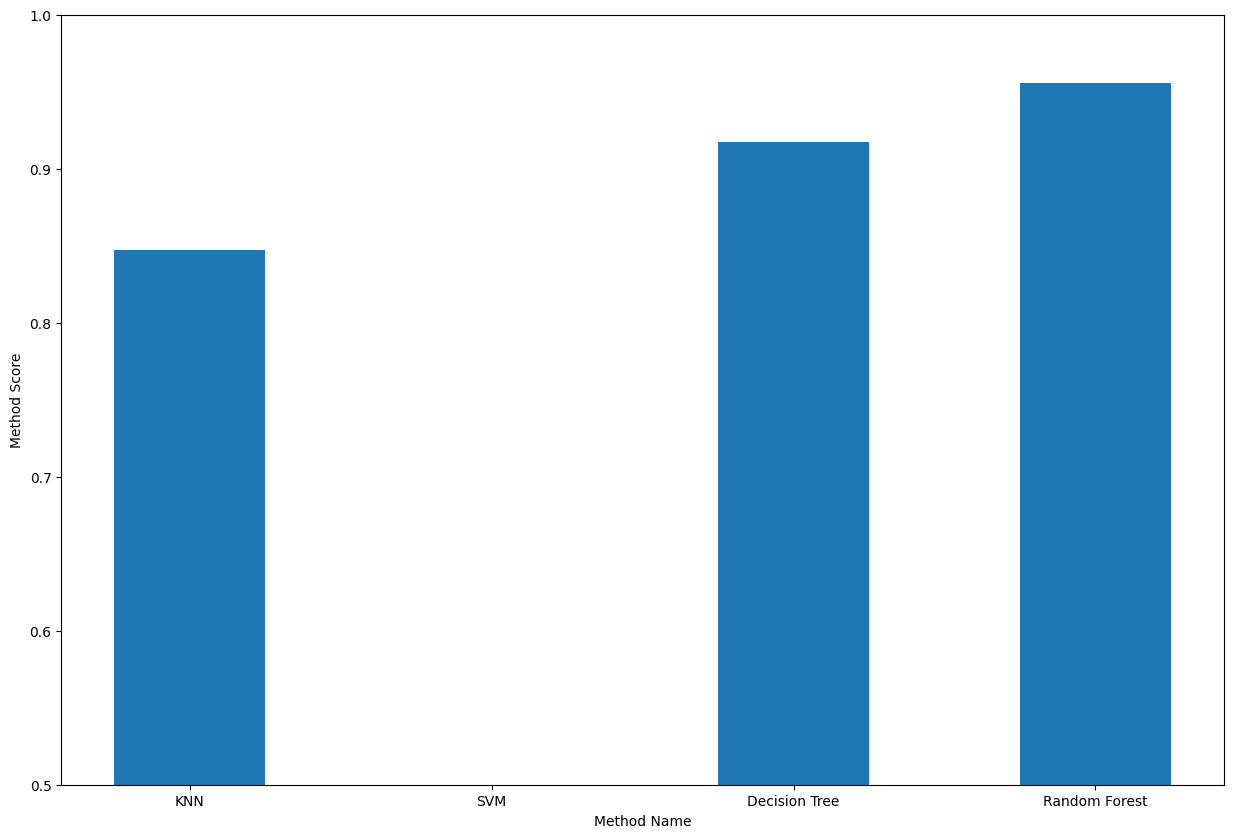

In [ ]:
plt.figure(figsize=(15,10))
plt.ylim([0.5,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')